In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from time import perf_counter

sys.path.append("/Net/Groups/BSI/work_scratch/ppapastefanou/src/QPy")

from src.postprocessing.qnc_defintions import Time_Reduction_Type
from src.postprocessing.qnc_output_parser import QNC_output_parser
from src.postprocessing.qnc_ncdf_reader import QNC_ncdf_reader
from src.postprocessing.qnc_rescaler import QNC_Rescaler
from src.postprocessing.qnc_obs_reader import QNC_obs_reader

In [3]:
os.listdir("/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/kmax_gammastem")

['09_run_slope_opt_manu_soil_params',
 '01_initial_variation',
 '10_initial_variation_fixed_stom_clos',
 '07_run_slope_opt_manu_soil_params',
 '10_run_slope_opt_manu_soil_params',
 '05_initial_variation_fixed_stom_clos',
 '09_initial_variation_fixed_stom_clos',
 '02_initial_variation_fixed_stom_clos',
 '06_initial_variation_fixed_stom_clos',
 '03_initial_variation_fixed_stom_clos',
 '08_run_slope_opt_manu_soil_params',
 '04_initial_variation_fixed_stom_clos']

In [4]:
OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/kmax_gammastem/10_run_slope_opt_manu_soil_params'
post_dir = os.path.join(OUTPUT_DIR, 'post')
rmse_file = os.path.join(post_dir, 'standard_ranking.csv')
parameter_file = os.path.join(OUTPUT_DIR, 'parameters.csv')

In [5]:
OUTPUT_DIR

'/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/kmax_gammastem/10_run_slope_opt_manu_soil_params'

In [26]:
fid = 5316
parser = QNC_output_parser(os.path.join(OUTPUT_DIR,'output', str(fid)))
parser.Read()
output = parser.Available_outputs['fluxnetdata']
nc_output = QNC_ncdf_reader(os.path.join(OUTPUT_DIR, 'output', str(fid)),
                                        output.Categories,
                                        output.Identifier,
                                        output.Time_resolution
                                        )
nc_output.Parse_env_and_variables()   
nc_output.Read_all_1D()        
nc_output.Close()

In [17]:

nc_output.Datasets_1D['SPQ']['transpiration_avg']
#nc_output.Datasets_1D['SPQ']['rootzone_soilwater_potential']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
437995    0.0
437996    0.0
437997    0.0
437998    0.0
437999    0.0
Name: transpiration_avg, Length: 438000, dtype: float32

(-4.0, 0.0)

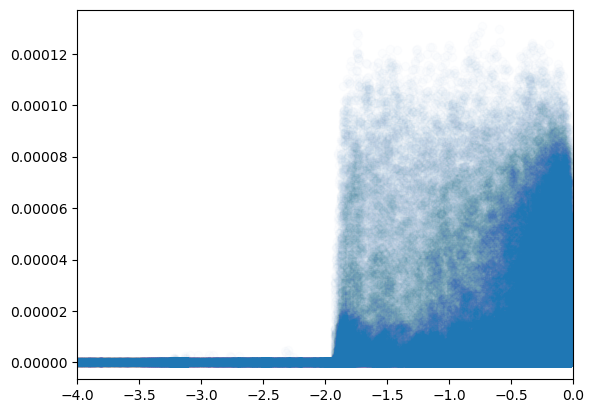

In [27]:
plt.scatter(nc_output.Datasets_1D['SPQ']['rootzone_soilwater_potential'], nc_output.Datasets_1D['SPQ']['transpiration_avg'], alpha = 0.01)
plt.xlim(-4, 0)

(-4.0, 0.0)

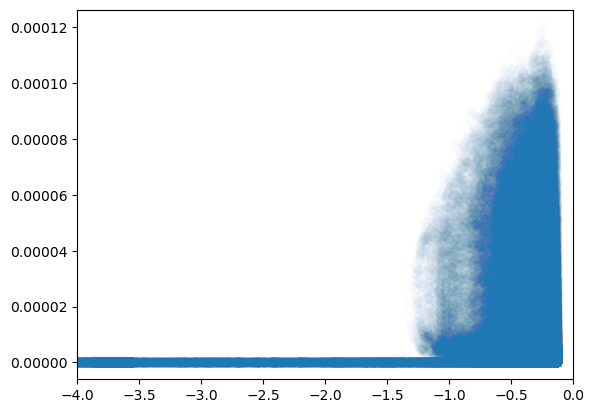

In [25]:
plt.scatter(nc_output.Datasets_1D['SPQ']['rootzone_soilwater_potential'], nc_output.Datasets_1D['SPQ']['transpiration_avg'], alpha = 0.01)
plt.xlim(-4, 0)